# MNIST 데이터 셋을 이용한 손글씨 인식

## 1. DNN 방식

In [1]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [2]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

display(y_test)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [3]:
import matplotlib.pyplot as plt

def show_data(arr):
    plt.imshow(arr, cmap=plt.cm.binary)
    
    reshape_data = arr.reshape(-1, )
    for index, data in enumerate(reshape_data):
        print('{:3d}'.format(data), end='')
        if index % 28 == 27:
            print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

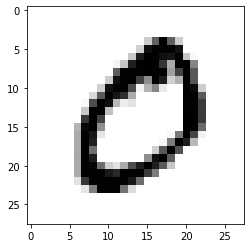

In [4]:
show_data(x_train[1])

In [5]:
reshape_x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
reshape_x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.InputLayer(input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [8]:
model.fit(
    reshape_x_train,
    y_train,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 19us/sample - loss: 3.5406 - acc: 0.3644 - val_loss: 1.4091 - val_acc: 0.5142
Epoch 2/50
48000/48000 [==============================] - 1s 13us/sample - loss: 1.2963 - acc: 0.5279 - val_loss: 1.1854 - val_acc: 0.5563
Epoch 3/50
48000/48000 [==============================] - 1s 13us/sample - loss: 1.1254 - acc: 0.5721 - val_loss: 1.0793 - val_acc: 0.5906
Epoch 4/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.9959 - acc: 0.6208 - val_loss: 0.9799 - val_acc: 0.6382
Epoch 5/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.9142 - acc: 0.6464 - val_loss: 0.9186 - val_acc: 0.6482
Epoch 6/50
48000/48000 [==============================] - 1s 14us/sample - loss: 0.8366 - acc: 0.6626 - val_loss: 0.8770 - val_acc: 0.6644
Epoch 7/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.7055 - acc: 0.7376 - val_loss: 0.

In [9]:
model.evaluate(reshape_x_test, y_test)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.2621 - acc: 0.9620


[0.2620517617187463, 0.962]

## 2. CNN 방식

In [10]:
model = Sequential()

model.add(layers.Conv2D(
    input_shape=(28, 28, 1),
    filters=64, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(
    filters=128, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal'
))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                62730     
Total params: 95,946
Trainable params: 95,946
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [12]:
model.fit(
    reshape_x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 26s 548us/sample - loss: 0.6402 - acc: 0.9234 - val_loss: 0.0866 - val_acc: 0.9740
Epoch 2/20
48000/48000 [==============================] - 26s 545us/sample - loss: 0.0715 - acc: 0.9781 - val_loss: 0.0847 - val_acc: 0.9763
Epoch 3/20
48000/48000 [==============================] - 26s 535us/sample - loss: 0.0532 - acc: 0.9836 - val_loss: 0.0681 - val_acc: 0.9803
Epoch 4/20
48000/48000 [==============================] - 26s 535us/sample - loss: 0.0381 - acc: 0.9878 - val_loss: 0.0748 - val_acc: 0.9788
Epoch 5/20
48000/48000 [==============================] - 26s 534us/sample - loss: 0.0325 - acc: 0.9894 - val_loss: 0.0748 - val_acc: 0.9808
Epoch 6/20
48000/48000 [==============================] - 26s 539us/sample - loss: 0.0264 - acc: 0.9908 - val_loss: 0.0877 - val_acc: 0.9806
Epoch 7/20
48000/48000 [==============================] - 26s 534us/sample - loss: 0.0246 - acc: 0.9919 

In [16]:
model.evaluate(reshape_x_test, y_test)

10000/10000 [==============================] - 2s 167us/sample - loss: 0.1273 - acc: 0.9828


[0.1272851848161038, 0.9828]